In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

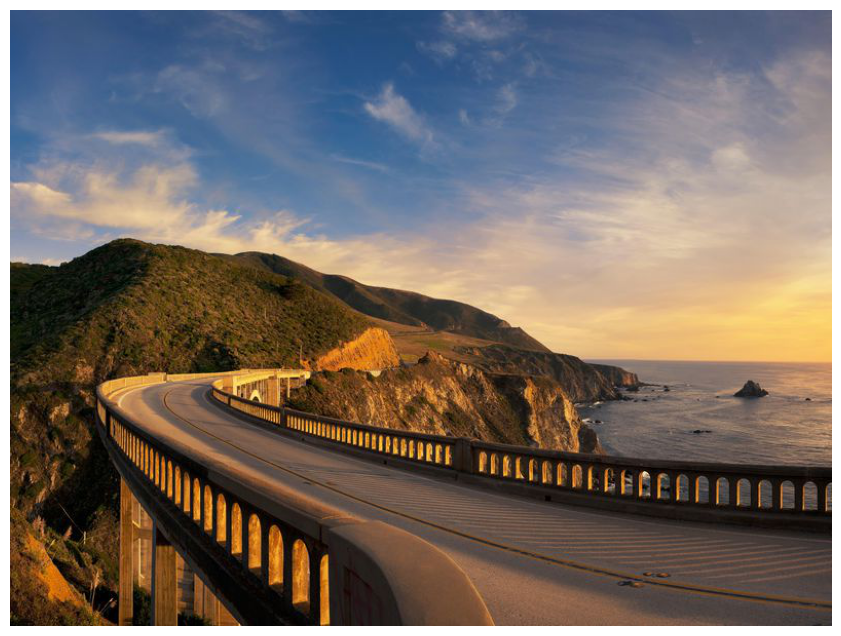

In [7]:
road_img = cv2.imread('Data/road_image.jpg')

road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2RGB)

display_img(road_img)

In [8]:
road_img.shape

(600, 800, 3)

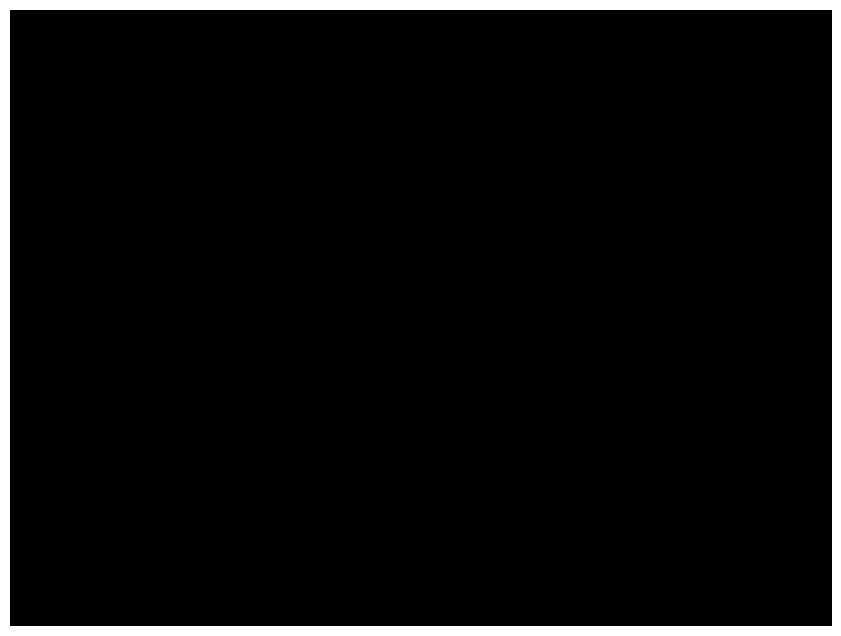

(600, 800)

In [10]:
#black img of shape as road_img

marker_img = np.zeros(road_img.shape[:2], dtype=np.int32)

display_img(marker_img)

marker_img.shape

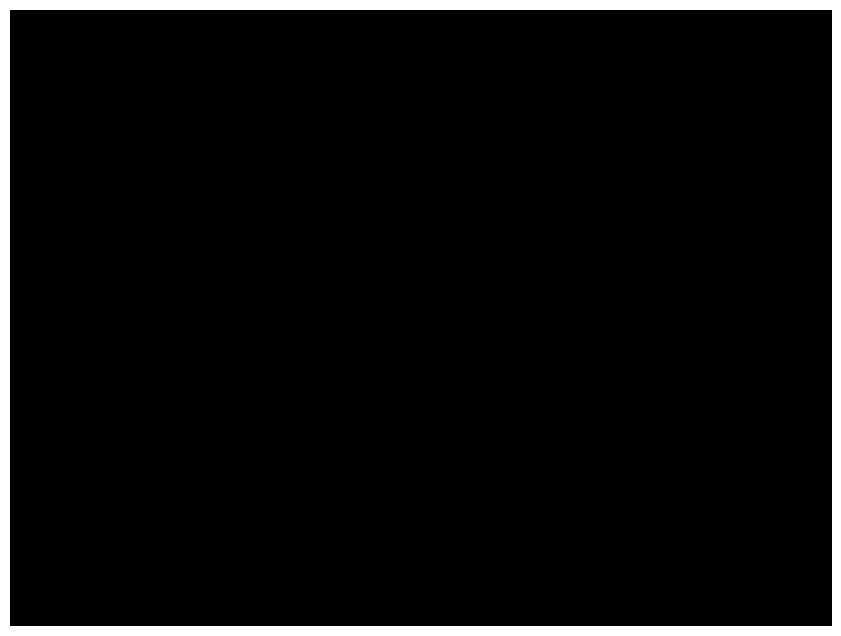

(600, 800, 3)

In [12]:
#segments-same as shape as marker_img but along with color spaces

segments = np.zeros(road_img.shape, dtype=np.uint8)

display_img(segments)

segments.shape

In [13]:
from matplotlib import cm

#colormaps reference - colors for markers(indexable)
#can grab color from these mappings
#tab10 - distinct colors


In [14]:
cm.tab10(0)

#this returns r g b alpha parameters
#all are scaled b/w 0 & 1
#this is list of all colormappings

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [15]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [16]:
#to make them scale b/w 0-255

tuple(np.array(cm.tab10(0)[:3])*255)

(31.0, 119.0, 180.0)

In [17]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

#returns tuple of rgb coplors

In [18]:
colors = []

for i in range(10): #for 10 iterations
    colors.append(create_rgb(i))
    #for 10 created 10 colors list
    

In [19]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [20]:
###GLOBAL VARIABLES:####

n_markers = 10

#no. of marks for segments

current_marker = 1

#index position for list of colors-can be adjusted by user input

marks_updated = False

#if marks is updated or not 



In [21]:
#####CALL BACK FUNCTION####
road_img_copy = road_img.copy()
def mouse_callback(event, x, y, flags, param):
    global marks_updated
    if event == cv2.EVENT_LBUTTONDOWN:
        #drawing circle- one for tracking matkers that is sent to watershed algorithm
        #and other for user's image
        cv2.circle(marker_img, (x,y), 10, colors[current_marker], -1)
        cv2.circle(road_img_copy, (x,y), 10, colors[current_marker], -1)
        marks_updated = True



In [23]:
#connectinf call back to window

cv2.namedWindow('Road Image')

cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('WaterShed Segments', segments)
    #black image
    cv2.imshow('Road Image', road_img_copy)
    #image user sees

    #closing windows
    
    k = cv2.waitKey(2)
    if k == ord('q'):
        break
    #to clear and start fresh
    elif k == ord('C'):
        road_img_copy=road_img.copy()
        marker_img = np.zeros(road_img.shape[:2], dtype=np.int32)
        segments = np.zeros(road_img.shape, dtype=np.uint8)
    
    elif k>0 and chr(k).isdigit():
        current_marker=int(chr(k))
        #if number is given then that color is taken for that segment

    #updating the markers
    if marks_updated:
        marker_img_copy = marker_img.copy()
        cv2.watershed(road_img, marker_img_copy)
        segments = np.zeros(road_img.shape, dtype=np.uint8)
        for color_index in range(n_markers):
            segments[marker_img_copy==(color_index)]=colors[color_index]
            #this colors segments
            

2025-03-24 22:01:16.266 python[10122:304295] +[IMKClient subclass]: chose IMKClient_Legacy
2025-03-24 22:01:16.266 python[10122:304295] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
